<a href="https://colab.research.google.com/github/Dyakonov/Colab/blob/main/dj_BERTScore_bad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# установка необходимых библиотек
!pip install transformers
!pip install datasets
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 15.2 MB/s 
     |████████████████████████████████| 182 kB 43.7 MB/s 
     |████████████████████████████████| 7.6 MB 34.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 13.7 MB/s 
     |████████████████████████████████| 212 kB 56.4 MB/s 
     |████████████████████████████████| 115 kB 37.2 MB/s 
     |████████████████████████████████| 127 kB 34.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 13.9 MB/s 


In [ ]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
# import warnings
# warnings.filterwarnings("ignore")
# pd.set_option('display.max_columns', None)
import matplotlib as mpl
plt.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from datasets import load_dataset
mode='train'
data = load_dataset("clinc_oos", "plus")
m = data[mode].num_rows # число объектов в датасете
print (f'число объектов = {m}')
texts = data[mode]['text']
labels = data[mode]['intent']

  0%|          | 0/3 [00:00<?, ?it/s]

число объектов = 15250


In [ ]:
from torchmetrics.text.bert import BERTScore
preds = ["hello there", "general kenobi"]
target = ["hello there", "master kenobi"]
bertscore = BERTScore()
score = bertscore(preds, target)
from pprint import pprint
rounded_score = {k: [round(v, 3) for v in vv] for k, vv in score.items()}
pprint(rounded_score)

/usr/local/lib/python3.7/dist-packages/torchmetrics/text/bert.py:164: UserWarning: The argument `model_name_or_path` was not specified while it is required when the default `transformers` model is used. It will use the default recommended model - 'roberta-large'.
  "The argument `model_name_or_path` was not specified while it is required when the default"


Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessiv

{'f1': [1.0, 0.996], 'precision': [1.0, 0.996], 'recall': [1.0, 0.996]}


In [ ]:
from random import shuffle

texts2 = texts.copy()
shuffle(texts2)



In [ ]:
score = bertscore(texts, texts2)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessiv

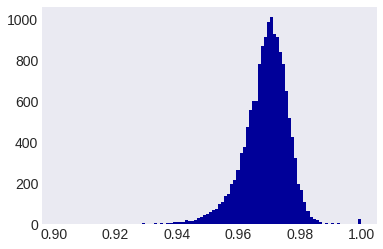

In [ ]:
plt.hist(score['precision'], bins=100, color='#000099');

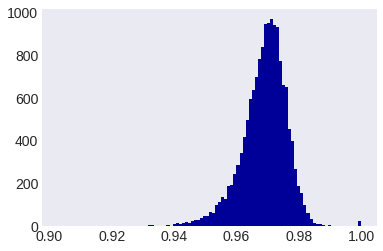

In [ ]:
plt.hist(score['recall'], bins=100, color='#000099');

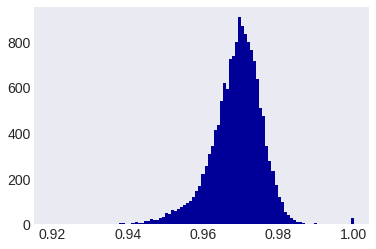

In [ ]:
plt.hist(score['f1'], bins=100, color='#000099');

In [ ]:
texts[0], texts2[0]

('what expression would i use to say i love you if i were an italian',
 'are there any new harmful things that could affect my credit score')

In [ ]:
bertscore(texts[0], texts2[0])

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessiv

{'precision': 0.94887375831604,
 'recall': 0.9614719152450562,
 'f1': 0.9551312923431396}

In [ ]:
from torchmetrics.text.bert import BERTScore
bertscore = BERTScore()
bertscore('If I have a got back time', 'Ooops, we did it again', idf=True)
#{'precision': 0.9788060188293457,
# 'recall': 0.9730527997016907,
# 'f1': 0.9759209752082825}

TypeError: ignored

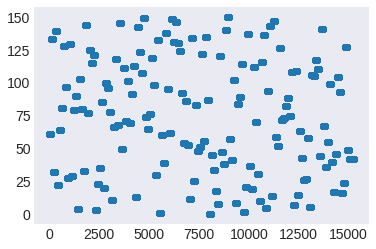

In [ ]:
plt.scatter(np.arange(m), np.array(labels))

In [ ]:
rounded_score

{'precision': [1.0, 0.996], 'recall': [1.0, 0.996], 'f1': [1.0, 0.996]}

In [ ]:
print (rounded_score)

{'precision': [1.0, 0.996], 'recall': [1.0, 0.996], 'f1': [1.0, 0.996]}


In [ ]:
pprint (rounded_score)

{'f1': [1.0, 0.996], 'precision': [1.0, 0.996], 'recall': [1.0, 0.996]}


In [ ]:
# !pip install evaluate
!pip install bert_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 5.0 MB/s 


In [ ]:
import evaluate
from evaluate import load
bertscore = load("bertscore")
predictions = ["hello world", "general kenobi"]
references = ["hello world", "general kenobi"]
results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
print(results)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

{'precision': [1.000000238418579, 1.0], 'recall': [1.000000238418579, 1.0], 'f1': [1.000000238418579, 1.0], 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.12(hug_trans=4.24.0)'}


In [ ]:
bertscore = load("bertscore")
bertscore.compute(predictions=['If I have a got back time'], references=['Ooops, we did it again'], model_type="distilbert-base-uncased")

{'precision': [0.6913013458251953],
 'recall': [0.6822929978370667],
 'f1': [0.6867676377296448],
 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.12(hug_trans=4.24.0)'}